<a href="https://colab.research.google.com/github/KanoonGammy/Data-Analytics-and-Data-Science-Tools-and-Programming/blob/main/practice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Pandas 2.1.4
NumPy 1.26.4
IPython 7.34.0
Matplotlib 3.7.1


In [92]:
# Get Data
data = pd.read_csv('https://raw.githubusercontent.com/ShaileshDhama/Exploratory-Data-Analysis-On-Pokemon-Dataset/master/Complete%20Pokemon.csv')

In [93]:
df = data.copy()
left_df = df.groupby('type1').count()['pokedex_number'].rename('type1')
right_df = df.groupby('type2').count()['pokedex_number'].rename('type2')

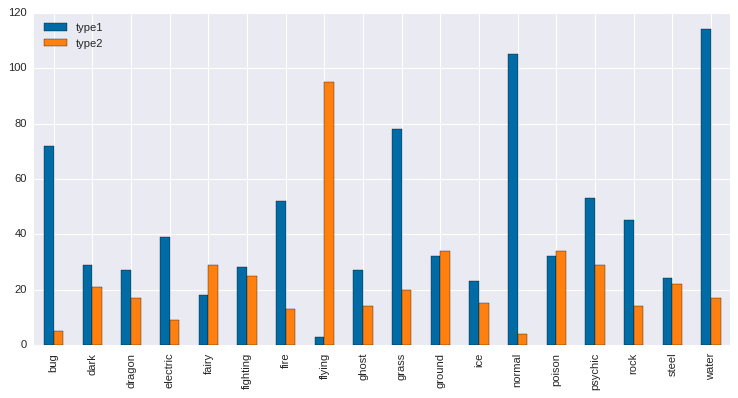

In [101]:
#1. (1.5 points) Plot the number of each pokemon type.
type_count  = pd.merge(left_df, right_df, how = 'outer', left_index = True, right_index = True)
plt.style.use('tableau-colorblind10')
# for i in plt.style.available :
#     print(f"stlye: {i}")
#     plt.style.use(i)
ax = type_count.plot(kind = 'bar', figsize = (10,5) )
plt.xlabel('')
plt.show()

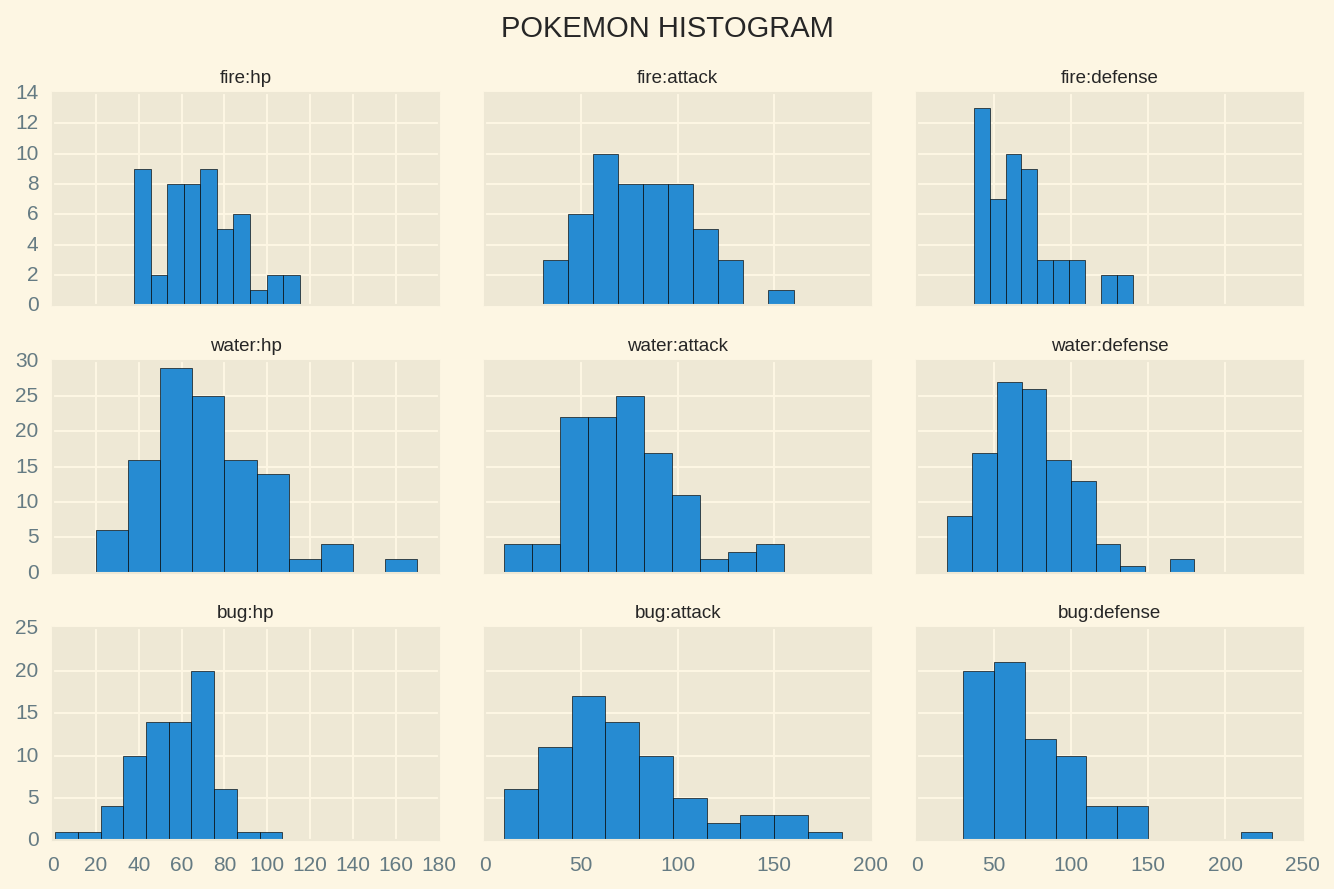

In [233]:
#2. (1.5 points) For pokemons whose type1 is fire, water, or bug, create one figure (with several subplots) to conclude their histograms of hp, attack, and defense.
pokemon_power = df[df['type1'].isin(['fire','water','bug'])]
pokemon_power = pokemon_power[['type1','hp','attack','defense']]

plt.style.use(plt.style.available[0])

fig, ax  = plt.subplots(3, 3, figsize = (9,6), sharex = 'col', sharey = 'row')

power_list = ['hp','attack','defense']
type_list =['fire', 'water', 'bug']

fig.dpi = 150
fig.suptitle('POKEMON HISTOGRAM', fontsize = 14)

for i, type_ in enumerate(type_list):
    for j, power in enumerate(power_list):

        ax[i,j].hist(pokemon_power[power][pokemon_power['type1'] == type_])
        ax[i,j].set_title(f"{type_}:{power}", fontsize = 9)

fig.subplots_adjust(top = 0.85, hspace=0.35, wspace=0.6)
fig.tight_layout()